In [3]:
import os

In [4]:
os.getcwd()

'D:\\Data_Science\\Week2-Day4'

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling   

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramDa

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<Figure size 720x540 with 0 Axes>

In [8]:
# Load the data
HRdata=pd.read_csv("D:\\Data_Science\\HR Analytics\\HR_comma_sep.csv",sep=',')

In [9]:
HRdata.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
HRdata.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [12]:
HRdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
HRdata.shape

(14999, 10)

In [16]:
pandas_profiling.ProfileReport(HRdata)

Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [17]:
numeric_var_names=[key for key in dict(HRdata.dtypes) if dict(HRdata.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(HRdata.dtypes) if dict(HRdata.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
['department', 'salary']


In [18]:
HR_num=HRdata[numeric_var_names]
HR_num.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [19]:
HR_cat = HRdata[cat_var_names]
HR_cat.head(5)

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [20]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=HR_num.apply(lambda x: var_summary(x)).T

In [21]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
satisfaction_level,14999.0,0.0,9191.89,0.612834,0.64,0.248631,0.061817,0.09,0.09,0.11,0.21,0.44,0.64,0.82,0.92,0.96,0.99,1.0
last_evaluation,14999.0,0.0,10740.81,0.716102,0.72,0.171169,0.029299,0.36,0.39,0.46,0.49,0.56,0.72,0.87,0.95,0.98,1.00,1.0
number_project,14999.0,0.0,57042.00,3.803054,4.00,1.232592,1.519284,2.00,2.00,2.00,2.00,3.00,4.00,5.00,5.00,6.00,7.00,7.0
average_montly_hours,14999.0,0.0,3015554.00,201.050337,200.00,49.943099,2494.313175,96.00,104.00,130.00,137.00,156.00,200.00,245.00,267.00,275.00,301.00,310.0
time_spend_company,14999.0,0.0,52470.00,3.498233,3.00,1.460136,2.131998,2.00,2.00,2.00,2.00,3.00,3.00,4.00,5.00,6.00,10.00,10.0
Work_accident,14999.0,0.0,2169.00,0.144610,0.00,0.351719,0.123706,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0
left,14999.0,0.0,3571.00,0.238083,0.00,0.425924,0.181411,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0
promotion_last_5years,14999.0,0.0,319.00,0.021268,0.00,0.144281,0.020817,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0


In [22]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

HR_num=HR_num.apply(lambda x: outlier_capping(x))

In [23]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

HR_num=HR_num.apply(lambda x: Missing_imputation(x))

In [25]:
pandas_profiling.ProfileReport(HR_num)

Number of variables,8
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,937.5 KiB
Average record size in memory,64.0 B
Numeric,5
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [26]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [27]:
HR_cat.head()

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [30]:
#for c_feature in categorical_features
#House_Price_cat=HouseP[['Brick', 'Neighborhood']]

for c_feature in ['department', 'salary']:
    HR_cat[c_feature] = HR_cat[c_feature].astype('category')
    HR_cat = create_dummies(HR_cat , c_feature )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [33]:
HR_cat.head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [34]:
HR_new = pd.concat([HR_num, HR_cat], axis=1)

In [35]:
HR_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,1,0


In [36]:
HR_new.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [37]:
HR_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null float64
average_montly_hours      14999 non-null float64
time_spend_company        14999 non-null float64
Work_accident             14999 non-null float64
left                      14999 non-null float64
promotion_last_5years     14999 non-null float64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             149

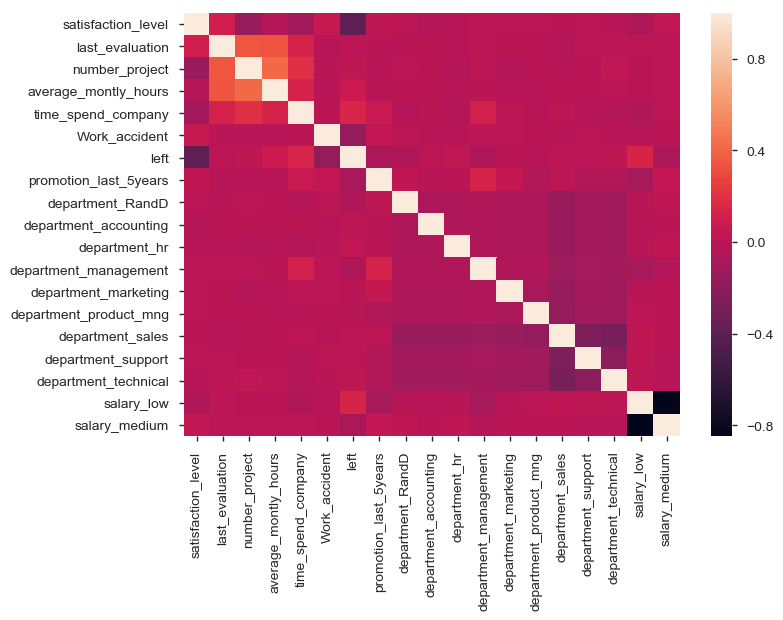

In [38]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(HR_new.corr())

In [39]:
HR_new.columns.difference(['Bad_Flag'])

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


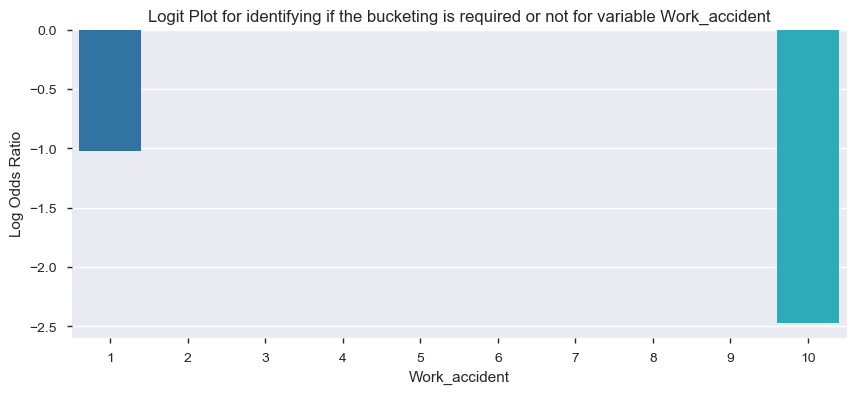

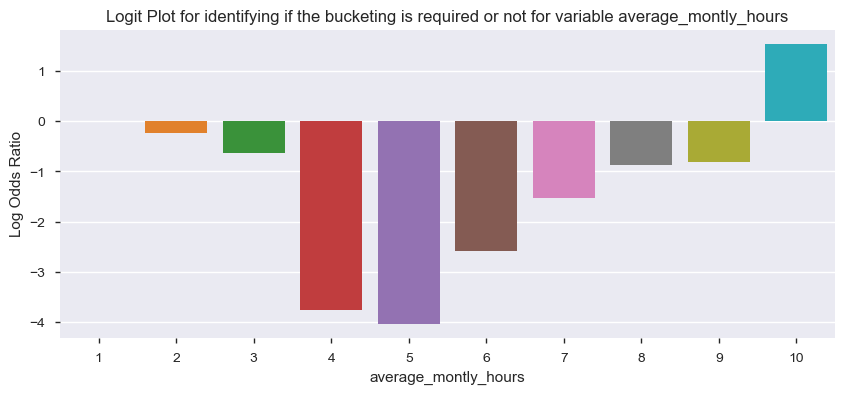

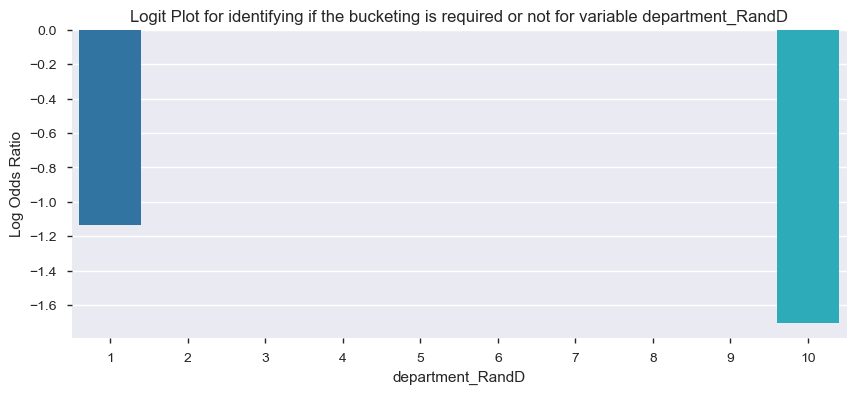

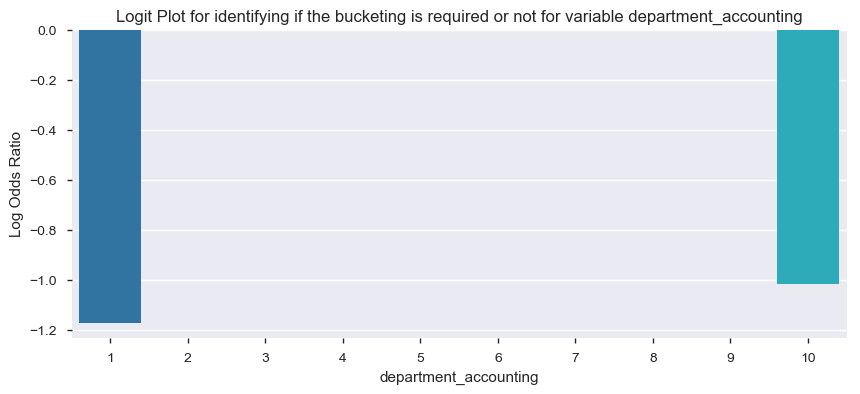

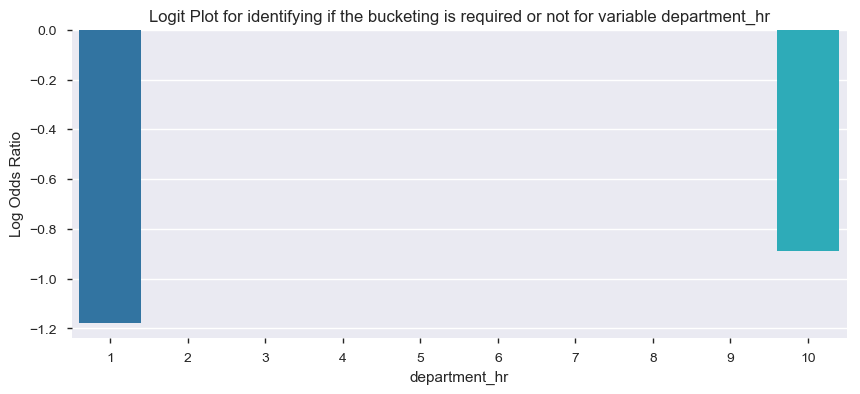

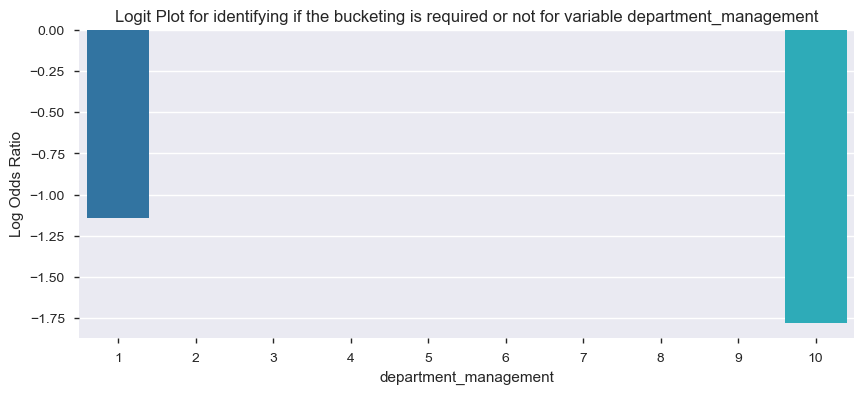

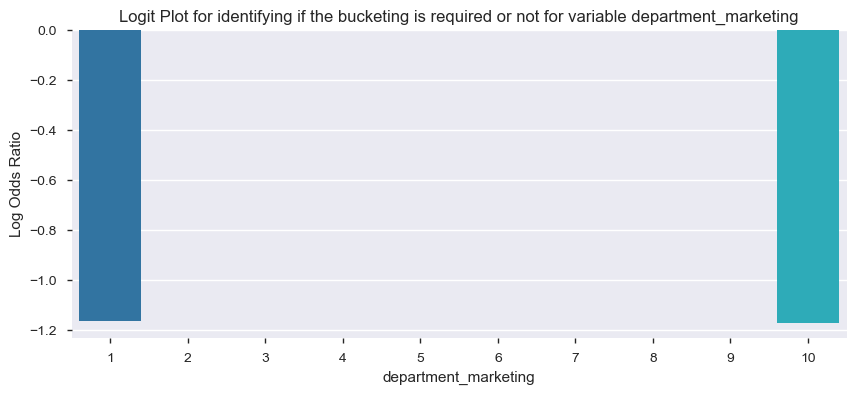

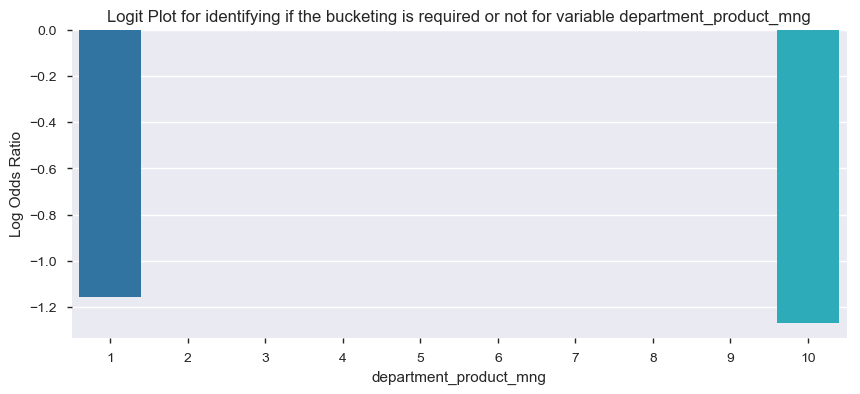

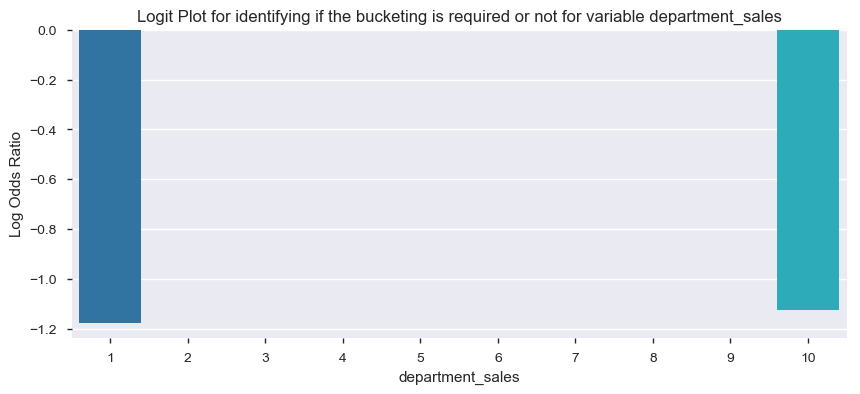

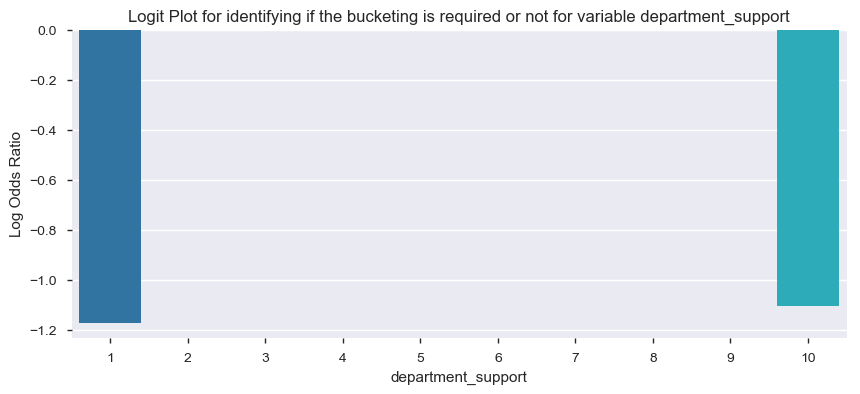

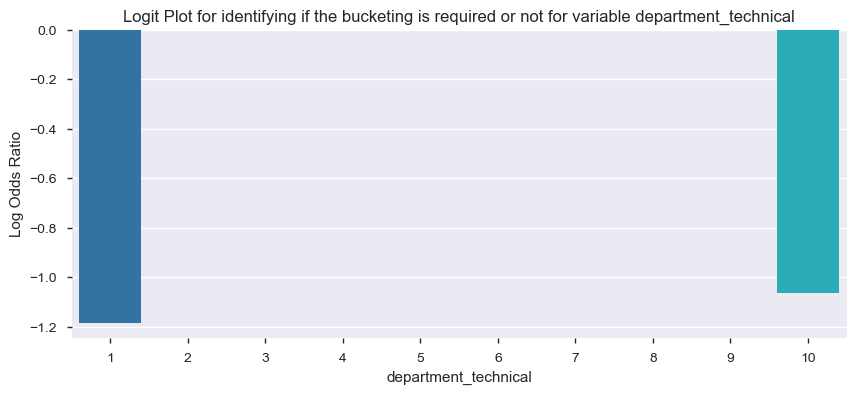

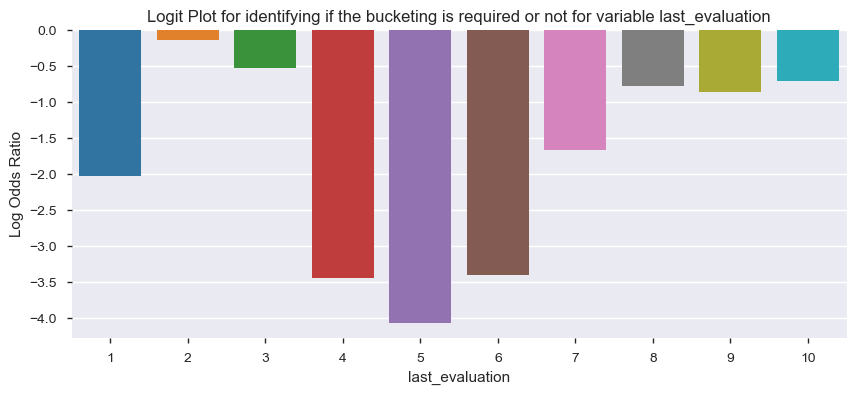

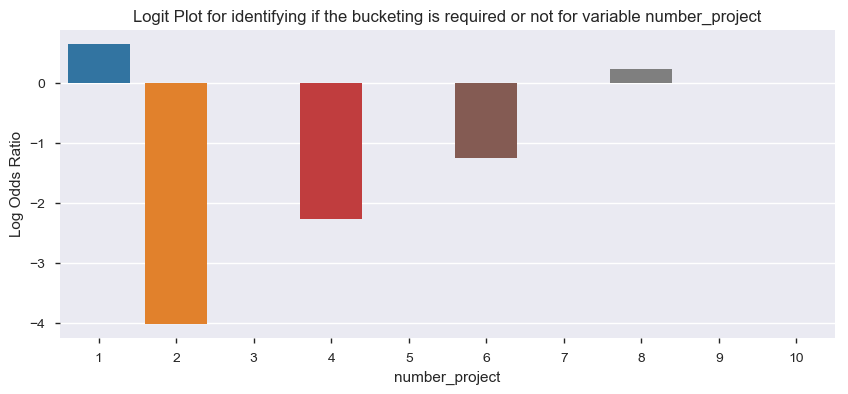

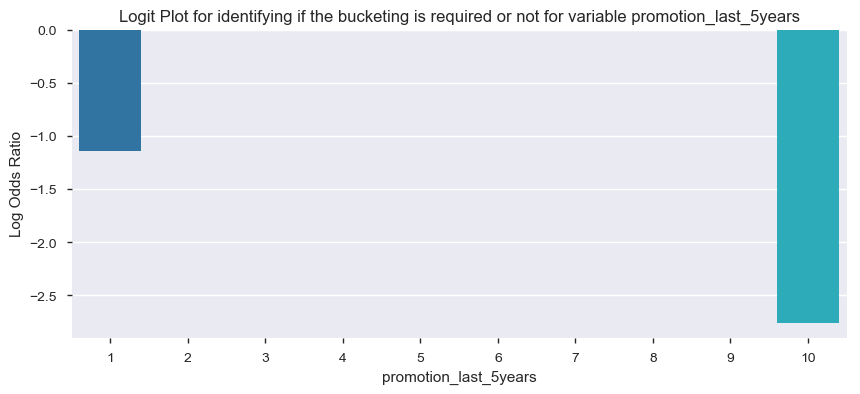

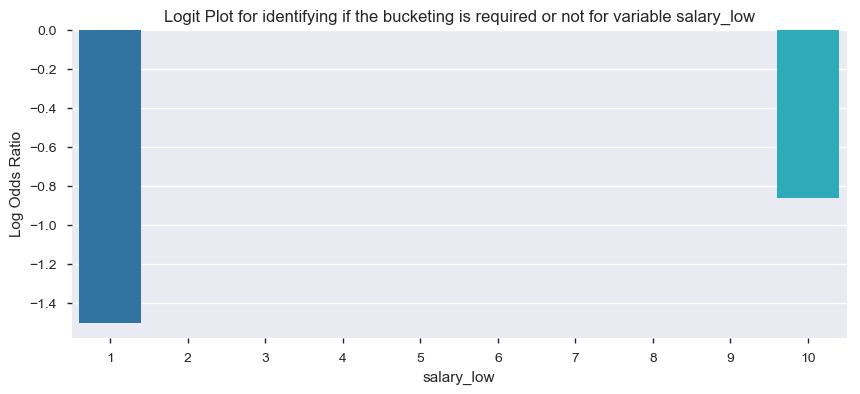

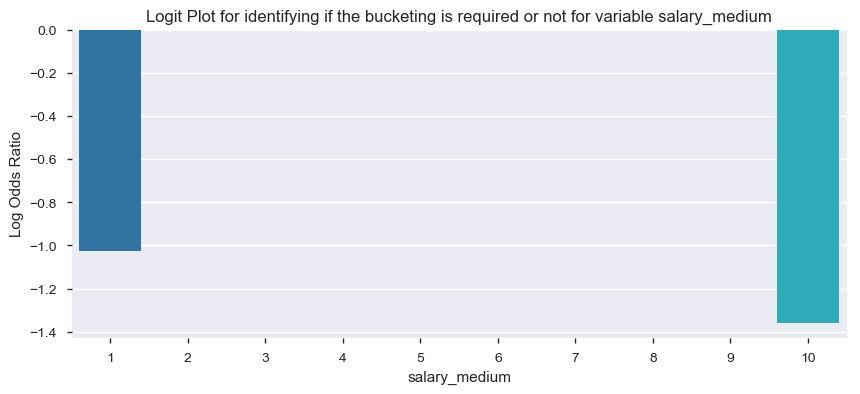

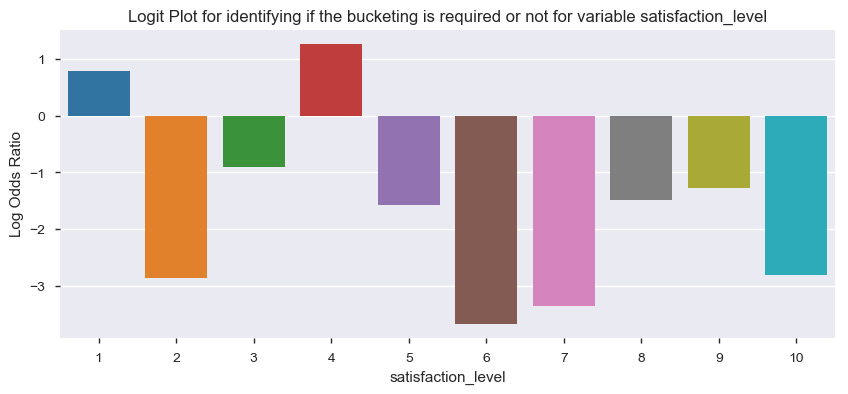

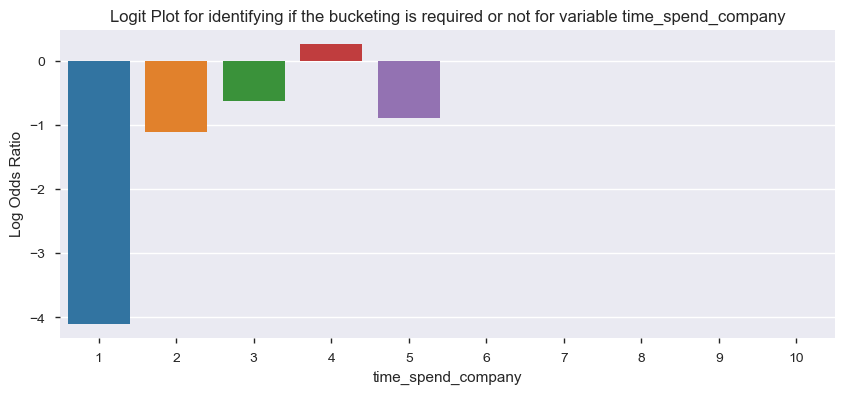

In [41]:
bp = PdfPages('Transformation Plots.pdf')

for num_variable in HR_new.columns.difference(['left']):
    binned = pd.cut(HR_new[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = HR_new.groupby(binned)['left'].sum() / (HR_new.groupby(binned)['left'].count()-HR_new.groupby(binned)['left'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [42]:
HR_new.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

##2.5 Data Exploratory Analysis
##- Variable Reduction using Somer's D values

In [43]:
HR_new.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [44]:
# Somerce D
logreg_model = sm.logit('left~satisfaction_level', data= HR_new).fit()

Optimization terminated successfully.
         Current function value: 0.473307
         Iterations 6


In [47]:
somersd_df = pd.DataFrame()
for num_variable in HR_new.columns.difference(['left']):
    logreg = sm.logit(formula = str('left ~ ')+str(num_variable), data=HR_new)
    result = logreg.fit()
    #summ = result.summary2()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(HR_new['left'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.534317
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546452
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547669
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.548747
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548478
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547682
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.548859
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548798
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548811
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548803
  

,Variable Name,SomersD
0,Work_accident,0.127683
0,average_montly_hours,0.0629711
0,department_RandD,0.0243938
0,department_accounting,0.00786189
0,department_hr,0.0143549
0,department_management,0.0216818
0,department_marketing,0.000468544
0,department_product_mng,0.00615643
0,department_sales,0.0104154
0,department_support,0.00893633


In [49]:
## Variance Inflation Factor assessment

X = []
features = "+".join(HR_new.columns.difference(['left']))


,Work_accident,average_montly_hours,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,last_evaluation,number_project,promotion_last_5years,salary_low,salary_medium,satisfaction_level,time_spend_company,left
0,0.0,157.0,0,0,0,0,0,0,1,0,0,0.53,2.0,0.0,1,0,0.38,3.0,1.0
1,0.0,262.0,0,0,0,0,0,0,1,0,0,0.86,5.0,0.0,0,1,0.80,6.0,1.0
2,0.0,272.0,0,0,0,0,0,0,1,0,0,0.88,7.0,0.0,0,1,0.11,4.0,1.0
3,0.0,223.0,0,0,0,0,0,0,1,0,0,0.87,5.0,0.0,1,0,0.72,5.0,1.0
4,0.0,159.0,0,0,0,0,0,0,1,0,0,0.52,2.0,0.0,1,0,0.37,3.0,1.0


In [50]:
features

'Work_accident+average_montly_hours+department_RandD+department_accounting+department_hr+department_management+department_marketing+department_product_mng+department_sales+department_support+department_technical+last_evaluation+number_project+promotion_last_5years+salary_low+salary_medium+satisfaction_level+time_spend_company'

In [54]:
a,b = dmatrices(formula_like='left ~ '+ 'Work_accident+average_montly_hours+salary_low+salary_medium+satisfaction_level+time_spend_company', data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

   VIF Factor              features
0   40.693894             Intercept
1    1.003669         Work_accident
2    1.016924  average_montly_hours
3    3.556992            salary_low
4    3.546817         salary_medium
5    1.016929    satisfaction_level
6    1.030070    time_spend_company


In [55]:
a,b = dmatrices(formula_like='left ~ '+ 'Work_accident+average_montly_hours+salary_medium+satisfaction_level+time_spend_company', data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

   VIF Factor              features
0   29.027137             Intercept
1    1.003619         Work_accident
2    1.016789  average_montly_hours
3    1.001459         salary_medium
4    1.014984    satisfaction_level
5    1.027327    time_spend_company


In [56]:
HR_new.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [69]:
HR_model = HR_new[['left','Work_accident','average_montly_hours','salary_medium','satisfaction_level','time_spend_company']]

In [70]:
HR_model.head()

,left,Work_accident,average_montly_hours,salary_medium,satisfaction_level,time_spend_company
0,1.0,0.0,157.0,0,0.38,3.0
1,1.0,0.0,262.0,1,0.80,6.0
2,1.0,0.0,272.0,1,0.11,4.0
3,1.0,0.0,223.0,0,0.72,5.0
4,1.0,0.0,159.0,0,0.37,3.0


In [71]:
#Train and Test split
train, test = train_test_split(HR_model, test_size=0.3, random_state=1234)
train.columns

Index(['left', 'Work_accident', 'average_montly_hours', 'salary_medium',
       'satisfaction_level', 'time_spend_company'],
      dtype='object')

###Building logistic Regression####

In [73]:
logreg = sm.logit(formula='left ~ Work_accident+average_montly_hours+salary_medium+time_spend_company+satisfaction_level', data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.451899
         Iterations 7


In [74]:
print(result.summary2())

                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.170    
Dependent Variable:    left              AIC:               9500.9844
Date:                  2018-11-23 13:01  BIC:               9544.5386
No. Observations:      10499             Log-Likelihood:    -4744.5  
Df Model:              5                 LL-Null:           -5717.2  
Df Residuals:          10493             LLR p-value:       0.0000   
Converged:             1.0000            Scale:             1.0000   
No. Iterations:        7.0000                                        
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept             0.0381   0.1288   0.2957 0.7675 -0.2144  0.2906
Work_accident        -1.5001   0.1048 -14.3185 0.0000 -1.7054 -1.2947
average_montly_hours  0.0020   0.0005   4.0196 0

In [75]:
train_gini = 2*metrics.roc_auc_score(train['left'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['left'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.5815004187241848
The Gini Index for the model built on the Test Data is :  0.610634616917803


In [76]:
train_auc = metrics.roc_auc_score(train['left'], result.predict(train))
test_auc = metrics.roc_auc_score(test['left'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The AUC for the model built on the Train Data is :  0.7907502093620924
The AUC for the model built on the Test Data is :  0.8053173084589015


In [77]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['left']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
14029,0.0,0.175301
1653,1.0,0.727593
14311,1.0,0.313575
10263,0.0,0.081807
14264,1.0,0.366494


In [78]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['left']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
7914,0.0,0.085872
14558,1.0,0.652535
12046,1.0,0.365106
11354,0.0,0.250238
12729,1.0,0.668682


In [79]:
np.linspace(0,1,50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [80]:
train_predict.head()
#cut-off = 0.2

,actual,prob
14029,0.0,0.175301
1653,1.0,0.727593
14311,1.0,0.313575
10263,0.0,0.081807
14264,1.0,0.366494


In [81]:
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 0.0 if x < 0.2 else 1.0)

In [82]:
train_predict.head()

,actual,prob,predicted
14029,0.0,0.175301,0.0
1653,1.0,0.727593,1.0
14311,1.0,0.313575,1.0
10263,0.0,0.081807,0.0
14264,1.0,0.366494,1.0


In [83]:
train_predict['tp'] = train_predict.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
train_predict['fp'] = train_predict.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
train_predict['tn'] = train_predict.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
train_predict['fn'] = train_predict.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)

In [84]:
train_predict.head(20)

,actual,prob,predicted,tp,fp,tn,fn
14029,0.0,0.175301,0.0,0.0,0.0,1.0,0.0
1653,1.0,0.727593,1.0,1.0,0.0,0.0,0.0
14311,1.0,0.313575,1.0,1.0,0.0,0.0,0.0
10263,0.0,0.081807,0.0,0.0,0.0,1.0,0.0
14264,1.0,0.366494,1.0,1.0,0.0,0.0,0.0
1236,1.0,0.318325,1.0,1.0,0.0,0.0,0.0
3391,0.0,0.041513,0.0,0.0,0.0,1.0,0.0
7121,0.0,0.093207,0.0,0.0,0.0,1.0,0.0
87,1.0,0.325773,1.0,1.0,0.0,0.0,0.0
13725,0.0,0.501329,1.0,0.0,1.0,0.0,0.0


In [85]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [86]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.234403
0,0.020408,0.999594,0.026250,0.254405
0,0.040816,0.993905,0.084598,0.297743
0,0.061224,0.987403,0.152401,0.348128
0,0.081633,0.980902,0.248320,0.420040
0,0.102041,0.973182,0.340259,0.488618
0,0.122449,0.940675,0.420254,0.542242
0,0.142857,0.898822,0.488057,0.584341
0,0.163265,0.849248,0.546156,0.617202
0,0.183673,0.799675,0.601393,0.647871


In [93]:
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity'] 

In [94]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.234403,1.000000
0,0.020408,0.999594,0.026250,0.254405,1.025844
0,0.040816,0.993905,0.084598,0.297743,1.078503
0,0.061224,0.987403,0.152401,0.348128,1.139805
0,0.081633,0.980902,0.248320,0.420040,1.229223


In [95]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.244898,0.712312,0.74745,0.739213,1.459762


In [96]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.632653,0.237708,0.973625,0.801124,1.211334


In [97]:
#Cut-off based on highest sensitivity
roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.0,1.0,0.0,0.234403,1.0


In [105]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.24 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.24 else 0)

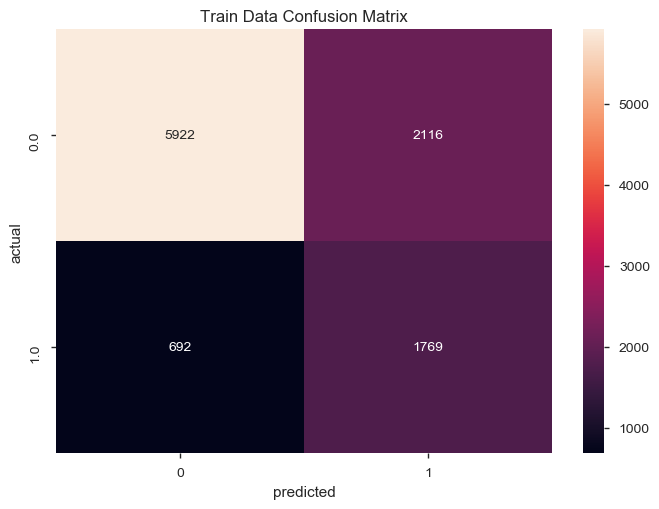

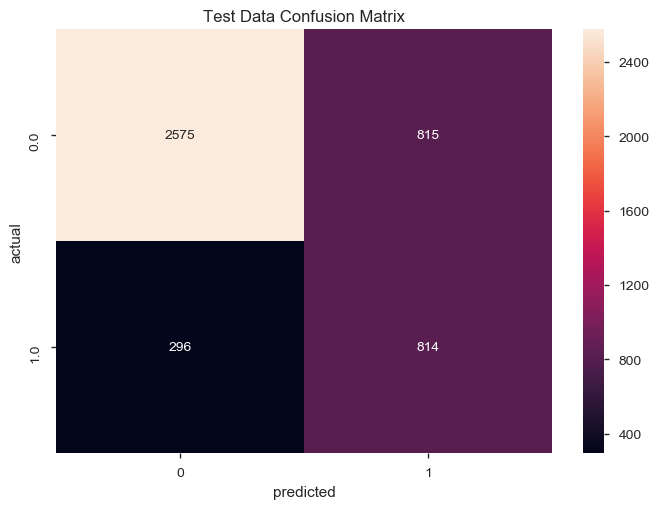

In [106]:
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()


In [100]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.7226402514525193
The overall accuracy score for the Test Data  is :  0.7415555555555555


In [101]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

             precision    recall  f1-score   support

        0.0       0.90      0.72      0.80      8038
        1.0       0.44      0.73      0.55      2461

avg / total       0.79      0.72      0.74     10499



In [102]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

             precision    recall  f1-score   support

        0.0       0.90      0.74      0.81      3390
        1.0       0.48      0.75      0.59      1110

avg / total       0.80      0.74      0.76      4500



In [107]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

             precision    recall  f1-score   support

        0.0       0.90      0.76      0.82      3390
        1.0       0.50      0.73      0.59      1110

avg / total       0.80      0.75      0.77      4500



In [108]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

In [109]:
train_predict.head()

,actual,prob,predicted,tp,fp,tn,fn,Deciles
14029,0.0,0.175301,0,0.0,0.0,1.0,0.0,4
1653,1.0,0.727593,1,1.0,0.0,0.0,0.0,9
14311,1.0,0.313575,1,1.0,0.0,0.0,0.0,7
10263,0.0,0.081807,0,0.0,0.0,1.0,0.0,1
14264,1.0,0.366494,1,1.0,0.0,0.0,0.0,8


In [111]:
no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']

In [112]:
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']

In [115]:
no_1s.sort_values(ascending=False)

Deciles
9    610.0
7    493.0
8    463.0
6    254.0
4    214.0
5    168.0
3    153.0
2     58.0
0     30.0
1     18.0
Name: actual, dtype: float64

In [116]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

In [117]:
train_predict.head()

,actual,prob,predicted,tp,fp,tn,fn,Deciles
14029,0.0,0.175301,0,0.0,0.0,1.0,0.0,4
1653,1.0,0.727593,1,1.0,0.0,0.0,0.0,9
14311,1.0,0.313575,1,1.0,0.0,0.0,0.0,7
10263,0.0,0.081807,0,0.0,0.0,1.0,0.0,1
14264,1.0,0.366494,1,1.0,0.0,0.0,0.0,8


In [118]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)

test_predict.head()

,actual,prob,predicted,Deciles
7914,0.0,0.085872,0,2
14558,1.0,0.652535,1,9
12046,1.0,0.365106,1,8
11354,0.0,0.250238,1,6
12729,1.0,0.668682,1,9


In [119]:
# Decile Analysis for train data

In [120]:
no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [121]:
Decile_analysis_train = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

In [122]:
Decile_analysis_train

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.841304,0.550214,610.0,440.0,1050
8,0.549597,0.347443,463.0,587.0,1050
7,0.347400,0.278591,493.0,557.0,1050
6,0.278579,0.223125,254.0,796.0,1050
5,0.223113,0.180894,168.0,881.0,1049
4,0.180869,0.143956,214.0,836.0,1050
3,0.143949,0.111840,153.0,897.0,1050
2,0.111781,0.083102,58.0,992.0,1050
1,0.083080,0.055276,18.0,1032.0,1050


In [124]:
# Decile Analysis for train data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.834521,0.556028,276.0,173.0,449
8,0.555581,0.350633,220.0,230.0,450
7,0.350356,0.273379,236.0,215.0,451
6,0.273169,0.221593,113.0,337.0,450
5,0.221544,0.180092,68.0,381.0,449
4,0.180090,0.143729,95.0,356.0,451
3,0.143568,0.110863,54.0,396.0,450
2,0.110772,0.082722,24.0,426.0,450
1,0.082712,0.055954,8.0,442.0,450


In [125]:
Decile_analysis_train.to_csv('Decile_analysis_train.csv')

In [126]:
Decile_analysis_test.to_csv('Decile_analysis_test.csv')

In [127]:
os.getcwd()

'D:\\Data_Science\\Week2-Day4'